<a href="https://colab.research.google.com/github/vikaspandeyds/DataScience/blob/master/Feature_Reduction_pca_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd, numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [0]:
########PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.98,random_state=1)
pca.fit(X)
X = pca.transform(X)

In [0]:
X = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
y=pd.DataFrame(data=y,columns=['target'])
Df = pd.concat([X, y[['target']]], axis = 1)
Df.head()

In [0]:
pca.score

<bound method PCA.score of PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)>

In [0]:
pca.explained_variance_ratio_

array([0.92946326, 0.05334452])

In [0]:
########LDA
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target
lda = LinearDiscriminantAnalysis(n_components=1)


In [0]:
# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


In [0]:
lda_var_ratios=lda.explained_variance_ratio_
lda_var_ratios

array([0.9912126])

In [0]:
#################
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

#################

In [0]:
select_n_components(lda_var_ratios, .98)

1

In [0]:
# k-means determine k
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    

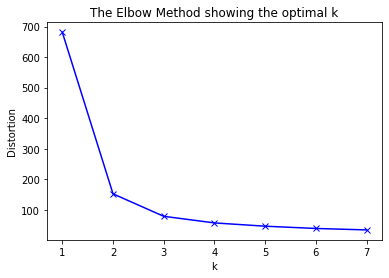

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



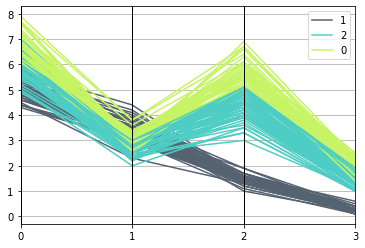

In [0]:
 kmeanModel = KMeans(n_clusters=3)
X=pd.DataFrame(X)
kmeanModel.fit(X)
import pandas 
predict = kmeanModel.predict(X)
X['cluster'] = predict
pandas.plotting.parallel_coordinates(X, 'cluster',color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

In [0]:
X.head()

,principal component 1,principal component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


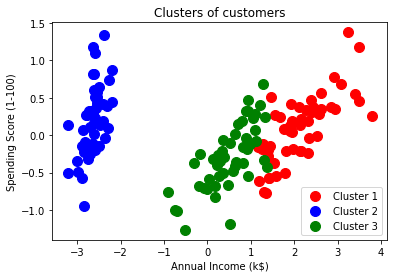

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X=Df

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

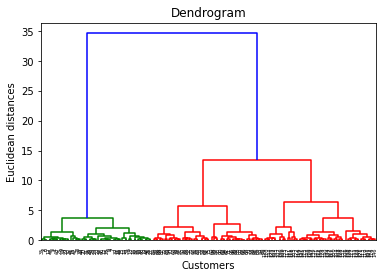

In [0]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



In [0]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
Df.iloc[y_hc == 1,0]

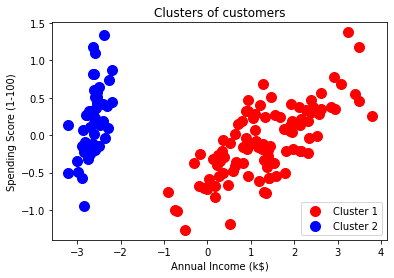

In [0]:

# Visualising the clusters
plt.scatter(Df.iloc[y_hc == 0, 0], Df.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Df.iloc[y_hc == 1, 0], Df.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [0]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2,  metric='euclidean',  min_samples = 2, n_jobs = -1)
clusters = outlier_detection.fit_predict(Df)

In [0]:
outlier_detection.labels_
df1=Df.iloc[outlier_detection.labels_==-1,:]
df1.count()

principal component 1    150
principal component 2    150
target                   150
dtype: int64

ValueError: ignored

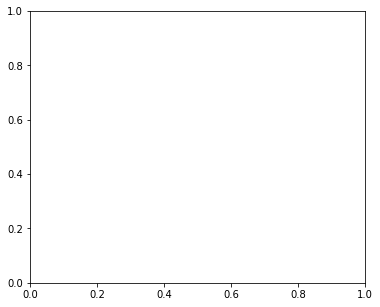

In [0]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(Df.iloc[outlier_detection.labels_==-1,0], Df.iloc[outlier_detection.labels_==-1,1], c=outlier_detection.labels_,cmap=cmap, colorbar = False)
fig.show()

In [0]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
labels_true=y
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 65
Homogeneity: 0.623
Completeness: 0.540
V-measure: 0.579
Adjusted Rand Index: 0.434
Adjusted Mutual Information: 0.571
Silhouette Coefficient: 0.242


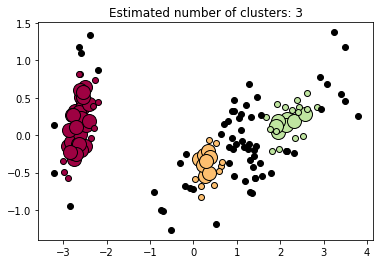

In [0]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X.iloc[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)

    xy = X.iloc[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()